In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy.stats import shapiro, normaltest, norm
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
df = pd.read_csv('./data/data.csv')
df.dropna(inplace=True)
df['Main Genre'] = df['Genres'].str.split(',').str[0].str.strip()
prog =0

Chi2 = 292.04, p-value = 0.000


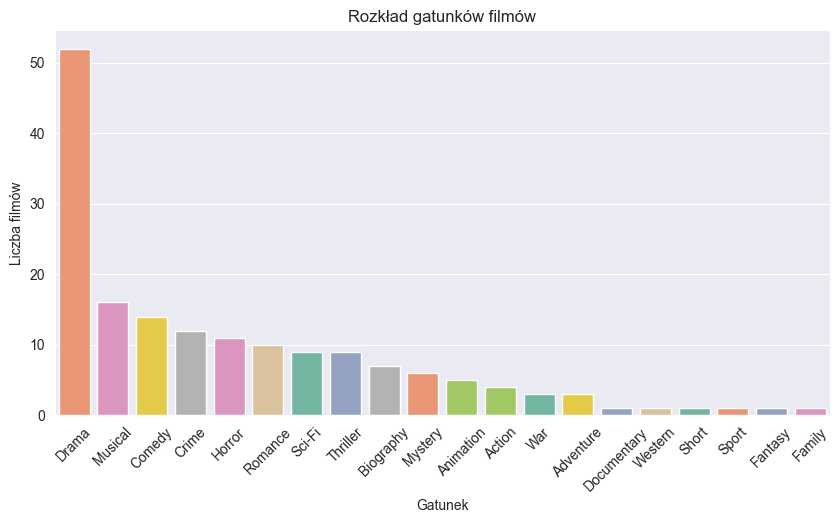

In [2]:
# Sprawdzenie, czy rozkład jest równomierny
observed = df['Main Genre'].value_counts().values
expected = [len(df)/len(observed)] * len(observed)
chi2, p = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.3f}")
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Main Genre', order=df['Main Genre'].value_counts().index, palette='Set2',hue='Main Genre')
plt.title('Rozkład gatunków filmów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=45)
plt.show()

time.sleep(3)

if p < 0.05:
    prog = input('Rozklad nie jest rownomierny ustal próg min. liczby wystąpień gatunku (liczba całkowita) i kliknij enter')
prog = int(prog)
counts = df['Main Genre'].value_counts()

df = df[df['Main Genre'].isin(counts[counts >= prog].index)]

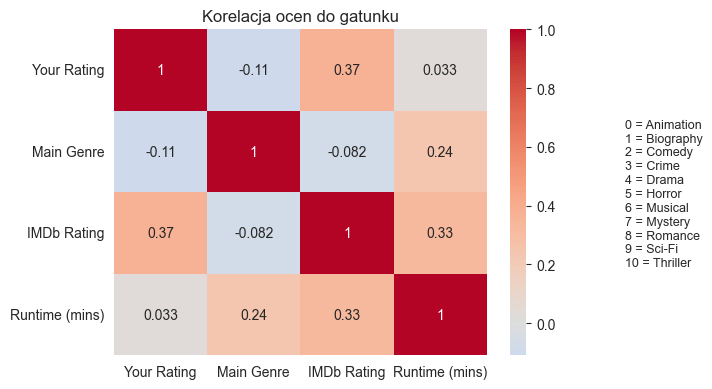

In [3]:
#Korelacja gatunek - ocena IMDb - moja ocena - czas trwania



df = df[df['Main Genre'].isin(counts[counts >= prog].index)]
subset = df[['Your Rating', 'Main Genre','IMDb Rating', 'Runtime (mins)']].copy()

le = LabelEncoder()
subset['Main Genre'] = le.fit_transform(subset['Main Genre'])

corr = subset.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Korelacja ocen do gatunku")

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
mapping_text = "\n".join([f"{v} = {k}" for k, v in mapping.items()])

plt.gcf().text(1.05, 0.5, mapping_text, fontsize=9, va='center')

plt.tight_layout()
plt.show()

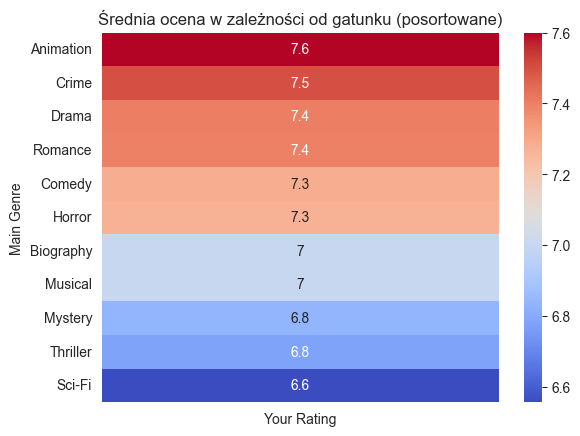

Najwyżej oceniany gatunek to: Animation
Filmy w tym gatunku:
['Kraina lodu', 'Flow', 'Czerwony Kapturek: Prawdziwa historia', 'Coco', 'Pingwiny z Madagaskaru']


In [4]:
#Oceny danych gatunków i filmy z najwyzej ocenianego


df = df[df['Main Genre'].isin(counts[counts >= prog].index)]
subset = df[['Your Rating', 'Main Genre']].copy()


le = LabelEncoder()
subset['Main Genre'] = le.fit_transform(subset['Main Genre'])
pivot = (
    df.pivot_table(values="Your Rating", index="Main Genre", aggfunc="mean")
      .sort_values(by="Your Rating", ascending=False)
)

sns.heatmap(pivot, annot=True, cmap="coolwarm")

plt.title("Średnia ocena w zależności od gatunku (posortowane)")
plt.show()


genre_means = df.groupby("Main Genre")["Your Rating"].mean()

best_genre = genre_means.idxmax()

best_genre_movies = df[df["Main Genre"] == best_genre]["Title"]

print(f"Najwyżej oceniany gatunek to: {best_genre}")
print("Filmy w tym gatunku:")
print(best_genre_movies.tolist())

In [ ]:
#Liczba wystąpień danego gatunku (jeśli mamy komedio-dramat to będzie policzone jako 2 filmy 1-dramat i 1-komedia)
genre_list = df['Genres'].str.split(',').sum()

genre_list = [g.strip() for g in genre_list]

print(pd.Series(genre_list).value_counts())